In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pre_survey = pd.read_csv('data/public-study/EmoTrak PreAssessment_November CLEAN 2017_11.14.csv')

In [4]:
pd.set_option('display.max_columns', 999)
pd.options.display.max_colwidth = 900
pre_survey.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q55,Q5_1,Q56,Q6,Q6_16_TEXT,Q6_22_TEXT,Q6_24_TEXT,Q7,Q7_4_TEXT,Q8,Unnamed: 28,Unnamed: 29,Q51,Q9,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q53,Q54,Q79_1,Q79_2,Q79_3,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q48,Q49,Q50,Q51.1,Q26_20,Q26_21,Q26_22,Q26_23,Q26_1,Q26_2,Q26_3,Q26_14,Q26_15,Q26_16,Q26_17,Q26_18,Q26_19,Q27_1,Q27_2,Q27_3,Q27_4,Q27_23,Q27_5,Q27_6,Q27_7,Q27_8,Q24_5,Q24_6,Q24_8,Q24_9,Q24_11,Q24_12,Q24_13,Q24_14,Q24_3,Q24_2,Q25_1,Q25_2,Q25_9,Q25_5,Q25_4,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,Q53_6,Q53_7,Q53_8,Q53_9,Q53_10,Q53_11,Q53_12,Q53_13,Q53_14,Q53_15,Q53_16,Q53_17,Q53_18,Q53_19,Q53_20,Q53_21,Q19_2 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Voluntary\rNature of Research Participation\r\rParticipation\rin research is voluntary.,"Please create your unique ID here.\r\r\tThis is the first and last letter of your Mother's first name ( If Mary, M,Y)\r\t The last letter of your first name (if your name is Paul -L)\r\tThe first letter of the month of your birth and the date of your birth ( If February 12th, - F12)\r\tFinally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277",How old are you? - Age,Repeat the ID here,Choose which categories best fit your background. - Selected Choice,Choose which categories best fit your background. - Other Asian - Text,Choose which categories best fit your background. - Other Pacific Islander - Text,Choose which categories best fit your background. - Other - Text,How do you identify your gender? - Selected Choice,How do you identify your gender? - Fill in - Text,Please select the category that fits your situation.,NaN,NaN,Are you currently residing in the United States?,Please enter your zip code.,Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,Please check the category that best represents the amount of education that you have completed (please check\ronly one category):,"Please check the category that best represents the amount of total household income earned last year. If you are financially assisted by your parents (partially or completely), please use your parent's income:","What is your occupation? (If you are a student, please write student and list any job if you have one)",Are you currently receiving mental health treatment?,Are you currently taking medication for your mental health?,Choose the option that best describes your mindfulness or meditation practice?,Where do you live?,Click to write the question text,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?,"1) Having a life that is stable and predictable means that you know where you will live, where you will work, and who will be in your life, which helps you plan for the future. How often do you feel that your life is stable and predictable?",2) \rFeeling\rlike you have control over your life means that you can determine how\ryou spend each day. How often do you feel like you have a lot of control\rover your daily l

### Cleaning the Data

- The following cell drops entries where the participant chose not to participate in the study.
- The columns listed in the following cell are also dropped. They are either all blank or what I consider to be irrelevent to the data analysis (IP address, Progress=100, how long they took to complete the survey, etc).

In [5]:
pre_survey = pre_survey.drop(pre_survey[pre_survey['Q2'] == 'I have read this consent form DO NOT Want to participate.'].index)

In [6]:
pre_survey.shape

(507, 124)

In [7]:
pre_survey = pre_survey.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'ResponseId', 'RecipientFirstName',
       'RecipientLastName', 'RecipientEmail', 'ExternalReference', 'DistributionChannel', 'UserLanguage', 'Q2', 'Unnamed: 28', 
       'Unnamed: 29', 'Q19_2 - Topics'], axis=1)

In [8]:
pre_survey.shape

(507, 106)

In [9]:
# reset header
header = pre_survey.iloc[0]

In [10]:
# take actual data from dataframe
pre_survey = pre_survey[2:]

In [11]:
# rename columns
pre_survey = pre_survey.rename(columns = header)

In [12]:
pre_survey.shape

(505, 106)

**The code below lists how many entries there are for the unique code identifier. This means that only 28 people out of 505 filled out that code (or at least that's how many we have in the dataset).**

In [13]:
pre_survey['Please create your unique ID here.\r\r\tThis is the first and last letter of your Mother\'s first name ( If Mary, M,Y)\r\t The last letter of your first name (if your name is Paul -L)\r\tThe first letter of the month of your birth and the date of your birth ( If February 12th, - F12)\r\tFinally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277'].notnull().sum()


28

### Distribution Plot For Age of Participants

In [14]:
pre_survey['How old are you? - Age'] = pre_survey['How old are you? - Age'].astype(int)

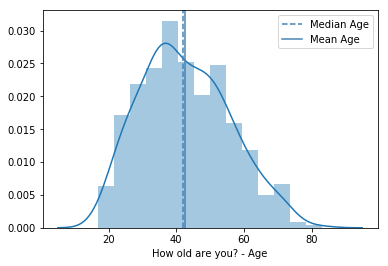

In [15]:
sns.distplot(pre_survey['How old are you? - Age']);
plt.axvline(x=(pre_survey['How old are you? - Age'].median()), ls='dashed', color = 'steelblue', label='Median Age');
plt.axvline(x=(pre_survey['How old are you? - Age'].mean()), ls='solid', color='steelblue', label='Mean Age');
plt.legend();

In [17]:
cols = list(pre_survey.columns.values)

In [18]:
demographics = cols[4:23]

In [19]:
categoricals = cols[24:]

### Code to show amount of missing data

In [20]:
total = pre_survey.isnull().sum().sort_values(ascending = False)
percent = (pre_survey.isnull().sum()/pre_survey.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
Choose which categories best fit your background. - Other Pacific Islander - Text,495,0.980198
How do you identify your gender? - Fill in - Text,492,0.974257
Choose which categories best fit your background. - Other Asian - Text,491,0.972277
Where do you live?,488,0.966337
Click to write the question text,480,0.950495
Choose which categories best fit your background. - Other - Text,480,0.950495
"Please create your unique ID here.\r\r\tThis is the first and last letter of your Mother's first name ( If Mary, M,Y)\r\t The last letter of your first name (if your name is Paul -L)\r\tThe first letter of the month of your birth and the date of your birth ( If February 12th, - F12)\r\tFinally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277",477,0.944554
Repeat the ID here,477,0.944554
"What is your occupation? (If you are a student, please write student and list any job if you have one)",191,0.378218
Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,190,0.376238


### Value Counts for Demographic Data

In [21]:
for col in demographics:
    print (col.upper(), ':')
    print (pre_survey[col].value_counts())
    print ()

HOW OLD ARE YOU? - AGE :
35    20
34    18
37    17
38    16
48    16
36    16
47    14
42    14
50    14
51    14
32    14
39    13
40    13
53    13
28    13
44    12
30    12
45    12
26    11
43    11
41    11
31    11
27    10
60    10
23    10
46    10
52     9
55     9
56     9
57     9
24     9
54     9
49     8
64     8
71     8
65     7
22     6
58     6
33     6
29     6
25     5
59     5
21     5
62     4
61     4
19     4
69     3
20     3
17     2
63     2
66     2
68     2
72     2
73     2
77     1
67     1
70     1
76     1
18     1
83     1
Name: How old are you? - Age, dtype: int64

REPEAT THE ID HERE :
EAAA2673       1
SPA24          1
MAIM1077       1
VAAS0112       1
YERS934        1
RHLJ800        1
AEEA1326       1
VAEF2622       1
GENO2986       1
TAOA0985       1
AAAF954        1
Jeed2029       1
Gwmj1547       1
DAEM2731       1
DBAF1156       1
Gnas569        1
DNXO1300       1
OEYA0581       1
RLM05041994    1
IAF40          1
KENF1163       1
HELS2895     